In [1]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# 32 feature detector(filters) with 3 rows and 3 columns (3 X 3 dimension) to create a convolutional layers with 32 feature maps
# working with cpu go for 32 instead of 64.
# to convert all our input image into all same single format with fixed size.
# 3d array for coloured and 2D for B&W
# 3D array composed of 3 channels, each channel corresponds to one colour (Blue, Green & Red and each channel corresponds to one 2D array that contains the pixels of our images.
# input_shape(64, 64, 3) for tensor flow backened corresponds to  3 channels for RBG (1 if B&W) with 256 X 256 are the dimensions of the 2D array.
# for theono backened use (3, 64, 64)
# activation = 'relu', rectifier function for nonlinearity

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer to improve the accuracy of the test set. 
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(activation = 'relu', units = 128))
classifier.add(Dense(activation = 'sigmoid', units = 1))


# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

batch_size = 32
classifier_history = classifier.fit_generator(training_set,
                         steps_per_epoch = 8000/batch_size,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000/batch_size)
import matplotlib.pyplot as plt
plt.plot(classifier_history.history['acc'])
plt.plot(classifier_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
plt.plot(classifier_history.history['loss'])
plt.plot(classifier_history.history['val_loss'])
plt.title('loss accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("The model class indices are:", training_set.class_indices)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
250/250 [==============================] - 309s 1s/step - loss: 0.6767 - acc: 0.5795 - val_loss: 0.6372 - val_acc: 0.6260
Epoch 2/25
250/250 [==============================] - 175s 699ms/step - loss: 0.6035 - acc: 0.6769 - val_loss: 0.7173 - val_acc: 0.6005
Epoch 3/25
250/250 [==============================] - 123s 490ms/step - loss: 0.5613 - acc: 0.7121 - val_loss: 0.5314 - val_acc: 0.7470
Epoch 4/25
250/250 [==============================] - 133s 533ms/step - loss: 0.5301 - acc: 0.7356 - val_loss: 0.5493 - val_acc: 0.7315
Epoch 5/25
250/250 [==============================] - 140s 559ms/step - loss: 0.5131 - acc: 0.7409 - val_loss: 0.5187 - val_acc: 0.7450
Epoch 6/25
250/250 [==============================] - 135s 542ms/step - loss: 0.4851 - acc: 0.7656 - val_loss: 0.4829 -

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

The model class indices are: {'cats': 0, 'dogs': 1}


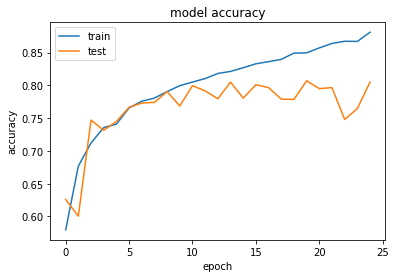

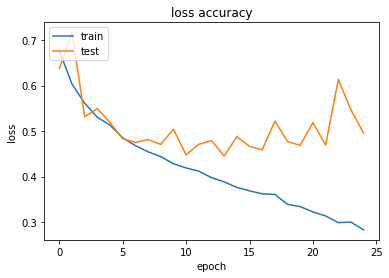

The model class indices are: {'cats': 0, 'dogs': 1}


In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(classifier_history.history['acc'])
plt.plot(classifier_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
plt.plot(classifier_history.history['loss'])
plt.plot(classifier_history.history['val_loss'])
plt.title('loss accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("The model class indices are:", training_set.class_indices)

In [3]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [4]:
result

array([[1.]], dtype=float32)

In [5]:
prediction

'dog'